<a href="https://colab.research.google.com/github/Raflidikap/MachineLearning/blob/main/Rafli_Dika_Pramudya_Praktikum_Tugas_Akhir.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Hai semuanya, pada kesempatan ini kalian akan mengerjakan tugas akhir berupa praktikum analisis data menggunakan PySpark.

Semangat Belajar dan Jangan menyerah :)

Silahkan download data berikut
https://drive.google.com/drive/folders/1NhEG9zRplX6QXnwhk9-QJxV1hmzpknGD?usp=sharing

dan masukan ke dalam google drive anda 

**1. Silahkan install PySpark**

In [47]:
!pip install pyspark py4j

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


**2. Silahkan Mengcreate Spark Session**

In [48]:
from pyspark.sql import SparkSession
spark = SparkSession.builder.appName("Spark-Mall_App").getOrCreate()
spark

**3. Masukan data yang telah di download pada google drive**

In [49]:
from google.colab import drive
drive.mount('/content/gdrive')
df = spark.read.csv('/content/gdrive/MyDrive/Colab Notebooks/Bisa.AI/mall.csv', header=True, inferSchema=True)

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


**4. Buat Perintah yang dapat menampilkan tipe data pada setiap kolom**

In [50]:
df.printSchema()

root
 |-- CustomerID: integer (nullable = true)
 |-- Gender: string (nullable = true)
 |-- Age: integer (nullable = true)
 |-- Annual Income (k$): integer (nullable = true)
 |-- Spending Score (1-100): integer (nullable = true)



**5. Buat perintah yang dapat menampilkan nama kolom, jumlah baris, dan jumlah kolom**

In [51]:
df.columns

['CustomerID', 'Gender', 'Age', 'Annual Income (k$)', 'Spending Score (1-100)']

In [52]:
print(f"Jumlah baris data : {df.count()}")

Jumlah baris data : 200


In [53]:
print(f"Jumlah kolom : {len(df.columns)}")

Jumlah kolom : 5


**6. Buat perintah yang dapat menampilkan statistik data pada setiap kolom**

In [54]:
df.describe().show()

+-------+------------------+------+-----------------+------------------+----------------------+
|summary|        CustomerID|Gender|              Age|Annual Income (k$)|Spending Score (1-100)|
+-------+------------------+------+-----------------+------------------+----------------------+
|  count|               200|   200|              200|               200|                   200|
|   mean|             100.5|  null|            38.85|             60.56|                  50.2|
| stddev|57.879184513951124|  null|13.96900733155888| 26.26472116527124|    25.823521668370173|
|    min|                 1|Female|               18|                15|                     1|
|    max|               200|  Male|               70|               137|                    99|
+-------+------------------+------+-----------------+------------------+----------------------+



**7. Buat perintah yang dapat menampilkan 2 kolom**

In [55]:
df.select('CustomerID', 'Age').show()

+----------+---+
|CustomerID|Age|
+----------+---+
|         1| 19|
|         2| 21|
|         3| 20|
|         4| 23|
|         5| 31|
|         6| 22|
|         7| 35|
|         8| 23|
|         9| 64|
|        10| 30|
|        11| 67|
|        12| 35|
|        13| 58|
|        14| 24|
|        15| 37|
|        16| 22|
|        17| 35|
|        18| 20|
|        19| 52|
|        20| 35|
+----------+---+
only showing top 20 rows



**8. Buat perintah yang dapat membuat kolom baru dengan menambahkan value pada nilai tabel**

In [56]:
df.withColumn('Age_Now', df.Age+2).show()

+----------+------+---+------------------+----------------------+-------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|Age_Now|
+----------+------+---+------------------+----------------------+-------+
|         1|  Male| 19|                15|                    39|     21|
|         2|  Male| 21|                15|                    81|     23|
|         3|Female| 20|                16|                     6|     22|
|         4|Female| 23|                16|                    77|     25|
|         5|Female| 31|                17|                    40|     33|
|         6|Female| 22|                17|                    76|     24|
|         7|Female| 35|                18|                     6|     37|
|         8|Female| 23|                18|                    94|     25|
|         9|  Male| 64|                19|                     3|     66|
|        10|Female| 30|                19|                    72|     32|
|        11|  Male| 67|               

**9. Buat perintah yang dapat melakukan perubahan pada nama kolom**

In [57]:
df.withColumnRenamed('Age', 'Age_Was').show()

+----------+------+-------+------------------+----------------------+
|CustomerID|Gender|Age_Was|Annual Income (k$)|Spending Score (1-100)|
+----------+------+-------+------------------+----------------------+
|         1|  Male|     19|                15|                    39|
|         2|  Male|     21|                15|                    81|
|         3|Female|     20|                16|                     6|
|         4|Female|     23|                16|                    77|
|         5|Female|     31|                17|                    40|
|         6|Female|     22|                17|                    76|
|         7|Female|     35|                18|                     6|
|         8|Female|     23|                18|                    94|
|         9|  Male|     64|                19|                     3|
|        10|Female|     30|                19|                    72|
|        11|  Male|     67|                19|                    14|
|        12|Female| 

**10. Buat Perintah yang dapat melakukan filter data pada salah satu kolom**

In [58]:
df.filter(df['Age'] > 25).show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         5|Female| 31|                17|                    40|
|         7|Female| 35|                18|                     6|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        13|Female| 58|                20|                    15|
|        15|  Male| 37|                20|                    13|
|        17|Female| 35|                21|                    35|
|        19|  Male| 52|                23|                    29|
|        20|Female| 35|                23|                    98|
|        21|  Male| 35|                24|                    35|
|        2

**11. Silahkan lakukan penampahan nilai data jika terdapat data kosong pada dataframe**

In [63]:
# melihat apakah terdapat null value di dalam dataset
df.filter('CustomerID is NULL').show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
+----------+------+---+------------------+----------------------+



In [67]:
df.filter('Gender is NULL').show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
+----------+------+---+------------------+----------------------+



In [65]:
df.filter('Age is NULL').show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
+----------+------+---+------------------+----------------------+



In [70]:
df.filter("'Annual Income (k$)' is NULL").show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
+----------+------+---+------------------+----------------------+



In [71]:
df.filter("'Spending Score (1-100)' is NULL").show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
+----------+------+---+------------------+----------------------+



In [75]:
df.show()

+----------+------+---+------------------+----------------------+
|CustomerID|Gender|Age|Annual Income (k$)|Spending Score (1-100)|
+----------+------+---+------------------+----------------------+
|         1|  Male| 19|                15|                    39|
|         2|  Male| 21|                15|                    81|
|         3|Female| 20|                16|                     6|
|         4|Female| 23|                16|                    77|
|         5|Female| 31|                17|                    40|
|         6|Female| 22|                17|                    76|
|         7|Female| 35|                18|                     6|
|         8|Female| 23|                18|                    94|
|         9|  Male| 64|                19|                     3|
|        10|Female| 30|                19|                    72|
|        11|  Male| 67|                19|                    14|
|        12|Female| 35|                19|                    99|
|        1

**12. Silahkan lakukan visualisasi data untuk salah satu kolom**

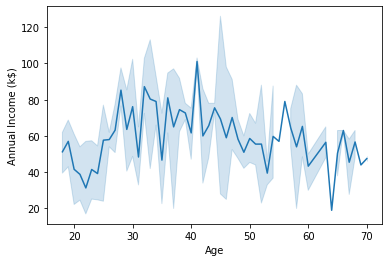

In [82]:
import seaborn as sns
import pandas as pd
#melihat hubungan antara umur dengan pendapatan seseorang
#ubah dataframe ke pandas
sns.lineplot(x='Age', y='Annual Income (k$)', data=df)